# Communicate Data Finding : Ford GoBike System Data

## I. Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

Bay Area Bike Share is a company that provides on-demand bike rentals for customers in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose. Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city. Users pay for the service either through a yearly subscription or by purchasing 3-day or 24-hour passes. Users can make an unlimited number of trips, with trips under thirty minutes in length having no additional charge; longer trips will incur overtime fees.

The Features included in the Data are as follows :

- Member Year of Birth
- Member Gender
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Trip Duration(in seconds)
- Bike ID
- Start Time and Date
- End Time and Date
- Start Station ID
- End Station ID
- Start Station Name
- End Station Name
- End Station Latitude
- End Station Longitude
- Start Station Latitude
- Start Station Longitude


In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

In [2]:
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [3]:
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
fordgobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
fordgobike.duplicated().sum()

0

In [6]:
fordgobike.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [7]:
fordgobike.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [8]:
fordgobike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

### Dataset Structure

our Dataset contians 183412 rows and 16 columns (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip)

### columns of our interset

we're intersted in :
- duration_sec
- start_time
- end_time
- start_station_id
- start_station_name 
- end_station_id
- end_station_name
- user_type
- member_birth_year
- member_gender
- bike_share_for_all_trip

## Cleaning the Data

first drop all unused columns ```'start_station_latitude', 'start_station_longitude', 'end_station_longitude', 'end_station_latitude', 'bike_id'```

In [9]:
fordgobike.drop(axis = 1 , columns = ['start_station_latitude', 'start_station_longitude', 'end_station_longitude', 'end_station_latitude', 'bike_id']
               , inplace = True)
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes


since we have 8265 cell of null values and we have 183412 rows then it's ok to remove the null values

In [10]:
fordgobike.dropna(inplace = True)
fordgobike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

now convert ```start_time``` and ```end_time``` to datetime object and ``` user_type``` and ```member_gender``` to categorical data

In [11]:
fordgobike['start_time'] = pd.to_datetime(fordgobike['start_time'])
fordgobike['end_time'] = pd.to_datetime(fordgobike['end_time'])

fordgobike['user_type'] = fordgobike['user_type'].astype('category')
fordgobike['member_gender'] = fordgobike['member_gender'].astype('category')

fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   user_type                174952 non-null  category      
 8   member_birth_year        174952 non-null  float64       
 9   member_gender            174952 non-null  category      
 10  bike_share_for_all_trip  174952 non-null  object        
dtypes: category(2), datetime64[ns](2), float64(3), int64(1), object(3)
memory usag

create new column for duration in minutes, trip start hour of the day, day of week and month

In [12]:
fordgobike['duration_minute'] = fordgobike['duration_sec']/60

fordgobike['start_hourofday'] = fordgobike.start_time.dt.strftime('%H')
fordgobike['start_dayofweek'] = fordgobike.start_time.dt.strftime('%A')
fordgobike['start_month'] = fordgobike.start_time.dt.strftime('%B')

create new column for trip end hour of the day , day of the week

In [13]:
fordgobike['end_hourofday'] = fordgobike.end_time.dt.strftime('%H')
fordgobike['end_dayofweek'] = fordgobike.end_time.dt.strftime('%A')

In [15]:
fordgobike['member_age'] = 2019 - fordgobike['member_birth_year']
fordgobike.drop(axis = 1 , columns = ['member_birth_year'] , inplace = True)
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_gender,bike_share_for_all_trip,duration_minute,start_hourofday,start_dayofweek,start_month,end_hourofday,end_dayofweek,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,Male,No,869.750000,17,Thursday,February,08,Friday,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,Male,No,1030.900000,12,Thursday,February,05,Friday,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,Other,No,608.166667,17,Thursday,February,04,Friday,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,Male,Yes,26.416667,23,Thursday,February,00,Friday,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,Subscriber,Male,No,29.883333,23,Thursday,February,00,Friday,60.0


In [16]:
fordgobike.describe()

,duration_sec,start_station_id,end_station_id,duration_minute,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,136.604486,11.733379,34.196865
std,1642.204905,111.648819,111.335635,27.370082,10.118731
min,61.000000,3.000000,3.000000,1.016667,18.000000
25%,323.000000,47.000000,44.000000,5.383333,27.000000
50%,510.000000,104.000000,101.000000,8.500000,32.000000
75%,789.000000,239.000000,238.000000,13.150000,39.000000
max,84548.000000,398.000000,398.000000,1409.133333,141.000000


# Univariate Exploration

first we draw the histogram of all numerical columns

array([[<AxesSubplot:title={'center':'duration_sec'}>,
        <AxesSubplot:title={'center':'start_station_id'}>],
       [<AxesSubplot:title={'center':'end_station_id'}>,
        <AxesSubplot:title={'center':'duration_minute'}>],
       [<AxesSubplot:title={'center':'member_age'}>, <AxesSubplot:>]],
      dtype=object)

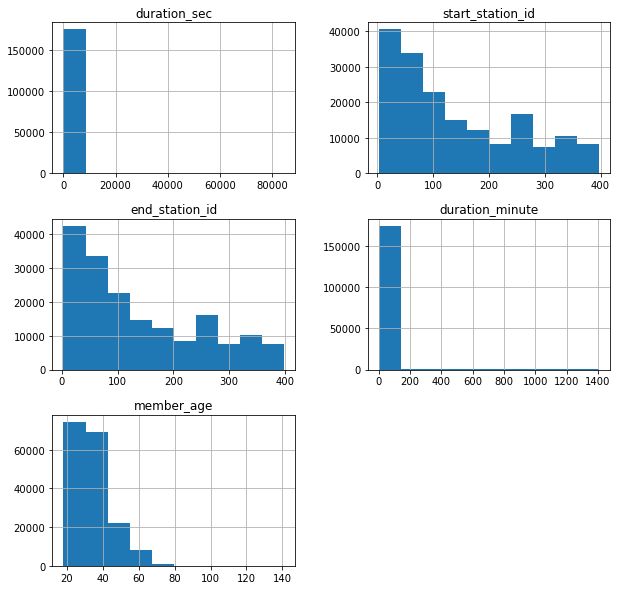

In [27]:
fordgobike.hist(figsize = (10,10))

#### 1- what's the average of the member age

(15.0, 80.0)

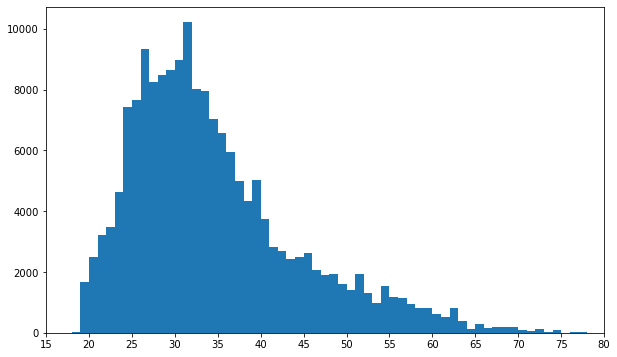

In [24]:
bins = np.arange(18,141+1,1)
xticks = np.arange(15,85,5)
plt.figure(figsize=(10,6))
plt.hist(data = fordgobike, x = 'member_age', bins = bins);
plt.xticks(xticks)
plt.xlim([15,80])

we notice that there's a peak at the age of 27 followed by another peak at 31. why did that happen

#### 2- what's the average of start day of the week

<AxesSubplot:>

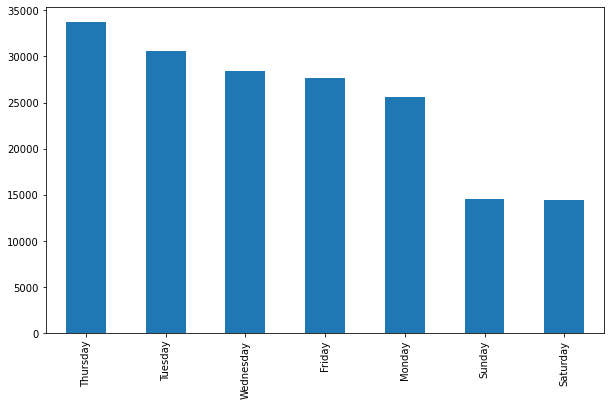

In [39]:
plt.figure(figsize=(10,6))
day_counter = fordgobike['start_dayofweek'].value_counts()
day_counter.plot.bar()

<AxesSubplot:>

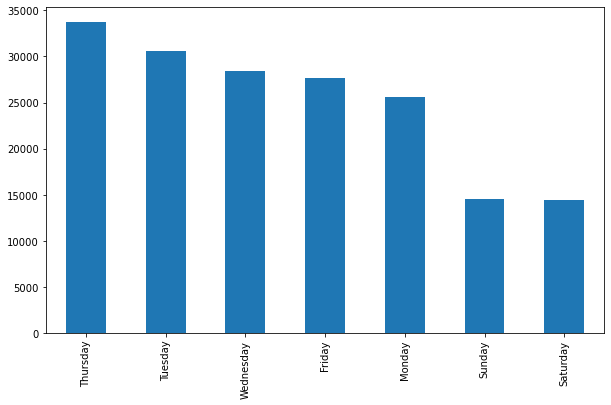

In [40]:
plt.figure(figsize=(10,6))
day_counter = fordgobike['end_dayofweek'].value_counts()
day_counter.plot.bar()